In [1]:
#读取图片并压缩
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats
%matplotlib inline

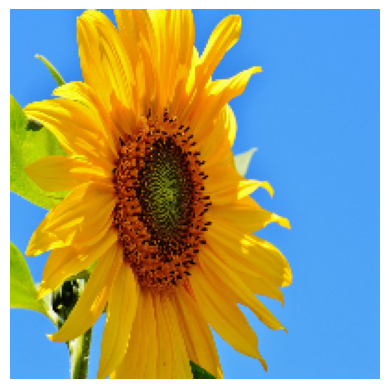

In [59]:
a = cv2.imread('./img/xrk.jpeg')
a = cv2.resize(cv2.cvtColor(a, cv2.COLOR_BGR2RGB), (200,200))
plt.imshow(a)
plt.axis("off")
plt.show()

In [60]:
#高斯噪声
def GaussieNoisy(image,sigma):
    row, col, ch= image.shape
    mean = 0
    gauss = np.random.normal(mean,sigma,(row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy = image + gauss
    return noisy.astype (np.uint8)


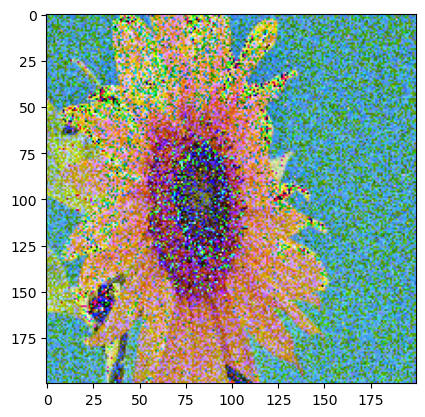

In [61]:
plt.imshow(GaussieNoisy(a,25))
plt.show()

In [62]:
#椒盐噪声
def spNoisy(image, s_vs_p= 0.5, amount = 0.004):
    row, col, ch = image.shape
    
    out = np. copy(image)
    num_salt = np.ceil(amount* image.size * s_vs_p)
    coords =[np. random. randint(0, i-1, int(num_salt)) for i in image. shape]
    out[coords] =1
    num_pepper = np.ceil(amount* image.size* (1. - s_vs_p))
    coords = [np. random.randint(0, i- 1, int (num_pepper)) for i in image.shape]
    out[coords] =0
    return out

C:\Users\John\AppData\Local\Temp\ipykernel_13772\1963438460.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] =1
C:\Users\John\AppData\Local\Temp\ipykernel_13772\1963438460.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] =0


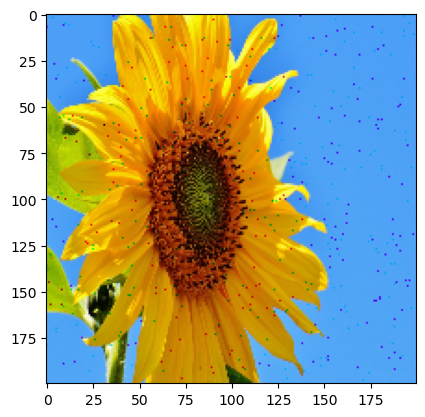

In [63]:
plt.imshow(spNoisy(a))
plt.show()

In [19]:
#算术均值滤波
def ArithmeticMeanOperator(roi):
    return np.mean (roi)
def ArithmeticMeanAlogrithm(image):
    new_image = np. zeros(image.shape)
    image= cv2.copyMakeBorder(image,1,1,1,1, cv2. BORDER_DEFAULT)
    for i in range(1,image.shape[0]-1):
        for j in range(1,image.shape[1]-1):
            new_image[i-1,j-1] = ArithmeticMeanOperator(image[i-1:i+2, j-1:j+2])
    new_image =(new_image-np.min(image))*(255/np.max(image))
    return new_image. astype(np.uint8)

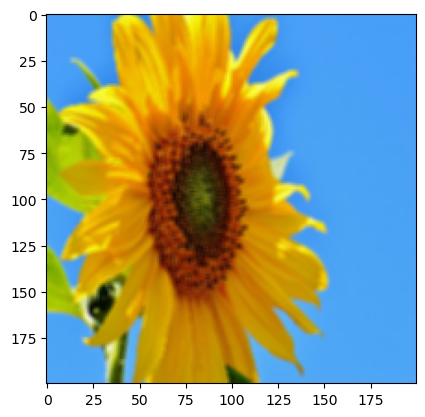

In [64]:
def rgbArithmeticMean(image):
    r,g,b = cv2.split(image)
    r= ArithmeticMeanAlogrithm(r)
    g=ArithmeticMeanAlogrithm(g)
    b= ArithmeticMean4logrithm(b)
    return cv2.merge([r, g, b])
plt.imshow(rgbArithmeticMean(a))
plt.show()

In [53]:
#几何均值滤波
def GeometricMeanOperator(roi):
    roi = roi.astype(np.float64)
    p = np.prod(roi)
    return p**(1/(roi.shape[0]*roi.shape[1]))
    
def GeometricMeanAlogrithm(image):
    new_image = np.zeros(image.shape)
    image = cv2.copyMakeBorder(image,1,1,1,1,cv2.BORDER_DEFAULT)
    for i in range(1,image.shape[0]-1):
        for j in range(1,image.shape[1]-1):
            new_image[i-1,j-1] = GeometricMeanOperator(image[i-1:i+2,j-1:j+2])
    new_image = (new_image-np.min(image))*(255/np.max(image))
    return new_image.astype(np.uint8)

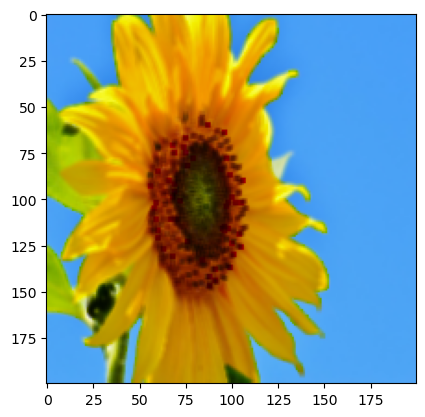

In [65]:
def rgbGemotriccMean(image):
    r,g,b = cv2.split(image)
    r = GeometricMeanAlogrithm(r)
    g = GeometricMeanAlogrithm(g)
    b = GeometricMeanAlogrithm(b)
    return cv2.merge([r,g,b])
plt.imshow(rgbGemotriccMean(a))
plt.show()

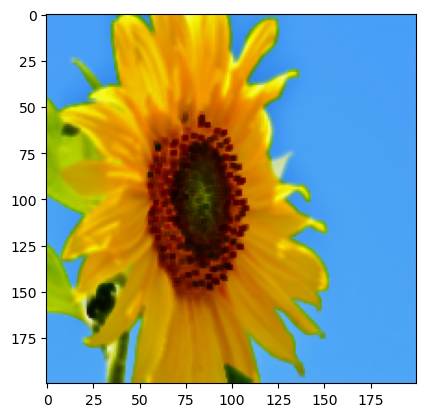

In [66]:
#谐波均值滤波
def HMeanOperator(roi):
    roi = roi.astype(np.float64)
    if 0 in roi:
        roi =0
    else:
        roi = scipy.stats.hmean(roi.reshape(-1))
    return roi
def HMeanAlogrithm(image):
    new_image = np.zeros(image.shape)
    image = cv2.copyMakeBorder(image,1,1,1,1,cv2.BORDER_DEFAULT)
    for i in range(1,image.shape[0]-1):
        for j in range(1,image.shape[1]-1):
            new_image[i-1,j-1] = HMeanOperator(image[i-1:i+2,j-1:j+2])
    new_image = (new_image-np.min(image))*(255/np.max(image))
    return new_image.astype(np.uint8)
def rgbHMean(image):
    r,g,b = cv2.split(image)
    r = HMeanAlogrithm(r)
    g = HMeanAlogrithm(g)
    b = HMeanAlogrithm(b) 
    return cv2.merge([r, g, b])
plt.imshow(rgbHMean(a))
plt.show()

C:\Users\John\AppData\Local\Temp\ipykernel_13772\3565312712.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return np.mean((roi)**(q+1))/np.mean((roi)**(q))


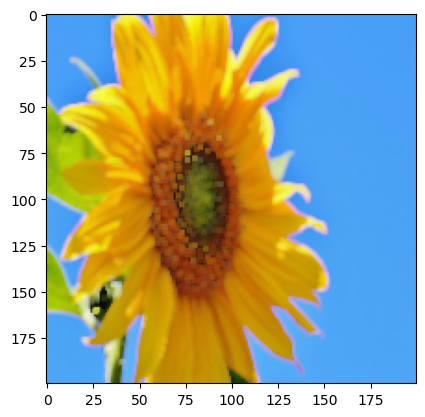

In [67]:
#逆谐波均值滤波
def IHMeanOperator(roi,q): 
    roi = roi.astype(np.float64)
    return np.mean((roi)**(q+1))/np.mean((roi)**(q))
def IHMeanAlogrithm(image,q):
    new_image = np.zeros(image.shape)
    image = cv2.copyMakeBorder(image,1,1,1, 1, cv2. BORDER_DEFAULT)
    for i in range(1,image.shape[0]-1):
        for j in range(1,image.shape[1]-1):
            new_image[i-1,j-1]=IHMeanOperator(image[i-1:i+2,j-1:j+2],q)
    new_image = (new_image-np.min(image))*(255/np.max(image))
    return new_image.astype(np.uint8)
def rgbIHMean(image,q):
    r,g,b =cv2.split(image)
    r = IHMeanAlogrithm(r,q)
    g = IHMeanAlogrithm(g,q)
    b = IHMeanAlogrithm(b,q)
    return cv2.merge([r, g, b])
plt.imshow (rgbIHMean(a,2))
plt.show()

C:\Users\John\AppData\Local\Temp\ipykernel_13772\1963438460.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] =1
C:\Users\John\AppData\Local\Temp\ipykernel_13772\1963438460.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] =0


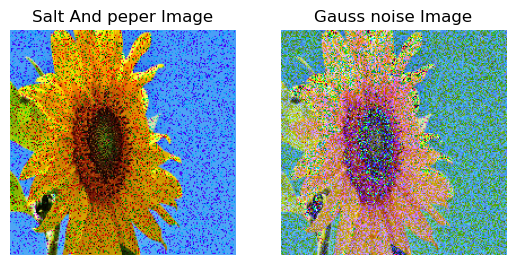

In [68]:
#图像的复原
spA = spNoisy(a,0.5,0.1)
gaussA=GaussieNoisy(a,25)
plt.subplot(121)
plt.title("Salt And peper Image")
plt.imshow(spA)
plt.axis("off")
plt.subplot(122)
plt.imshow(gaussA)
plt.axis("off")
plt.title("Gauss noise Image")
plt.show()

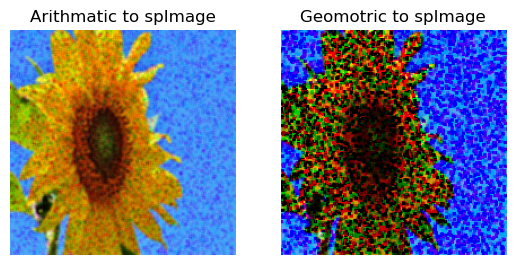

In [69]:
arith_sp_a = rgbArithmeticMean(spA)
gemo_sp_a = rgbGemotriccMean(spA)
plt.subplot(121)
plt.title("Arithmatic to spImage")
plt.imshow(arith_sp_a)
plt.axis("off")
plt.subplot(122)
plt.imshow(gemo_sp_a)
plt.axis("off")
plt.title("Geomotric to spImage")
plt.show()

C:\Users\John\AppData\Local\Temp\ipykernel_13772\3565312712.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return np.mean((roi)**(q+1))/np.mean((roi)**(q))


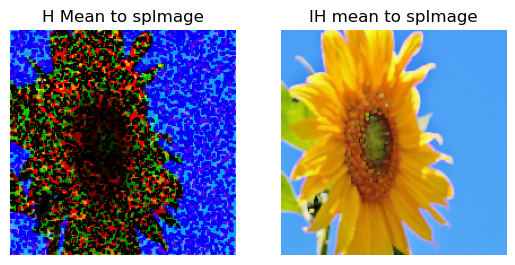

In [70]:
arith_sp_a = rgbHMean(spA)
gemo_sp_a = rgbIHMean(spA,3)
plt.subplot(121)
plt.title("H Mean to spImage")
plt.imshow(arith_sp_a)
plt.axis("off")
plt.subplot(122)
plt.imshow(gemo_sp_a)
plt.axis("off")
plt.title("IH mean to spImage")
plt.show()

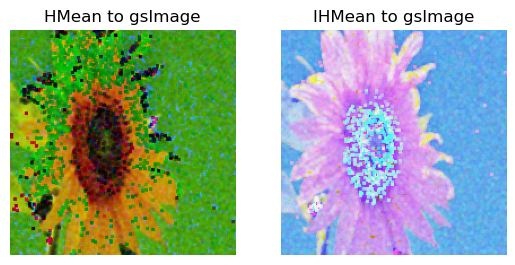

In [71]:
arith_gs_a = rgbHMean(gaussA)
gemo_gs_a = rgbIHMean(gaussA,3)
plt.subplot(121)
plt.title("HMean to gsImage")
plt.imshow(arith_gs_a)
plt.axis("off")
plt.subplot(122)
plt.imshow (gemo_gs_a)
plt.axis("off")
plt.title("IHMean to gsImage")
plt.show()